In [1]:
import os
import pickle

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split as tts

from sklearn.svm import SVC as svc

from sklearn.metrics import accuracy_score as accuracy

# **Diabetes** Prediction model
> ### Support Vector Machine

### Importing the dataset

In [2]:
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### EDA

In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.loc[:, "Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


c:\Users\mishr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


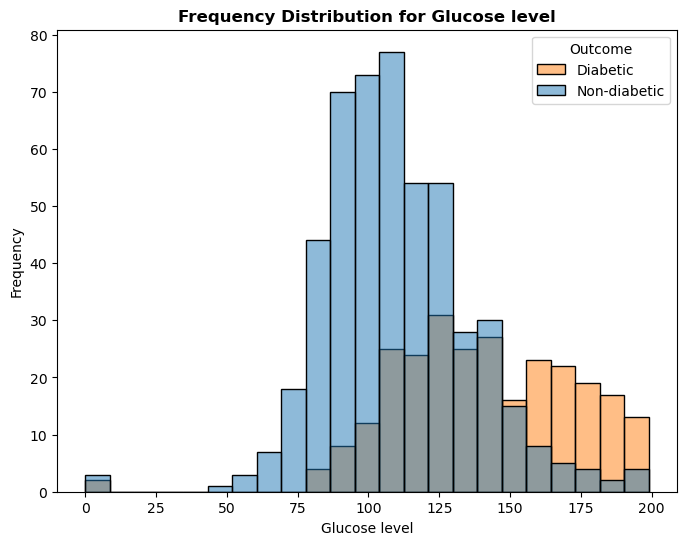

In [9]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x="Glucose", hue="Outcome")

plt.title("Frequency Distribution for Glucose level", fontweight="bold")
plt.xlabel("Glucose level")
plt.ylabel("Frequency")

plt.legend(title="Outcome", labels=["Diabetic", "Non-diabetic"])

plt.show()

### Preprocessing

In [10]:
X = df.drop(columns="Outcome", axis=1).values
y = df["Outcome"].values

X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [11]:
ss = SS()
X = ss.fit_transform(X)

X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [12]:
test_size = 0.1
X_train, X_test, y_train, y_test = tts(X, y, test_size=test_size, stratify=y, random_state=34)

X_test.shape

(77, 8)

### Model training

In [13]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
g = 'auto'
c = 4.0

In [14]:
model = svc(kernel=kernels[0], gamma=g, C=c)
model.fit(X_train, y_train)

model

SVC(C=4.0, gamma='auto', kernel='linear')

### Model testing

#### Training data

In [15]:
y_pred_train = model.predict(X_train)

print(f"Model accuracy on Training data : {round(accuracy(y_pred_train, y_train) * 100, 2)}%")

Model accuracy on Training data : 76.99%


#### Testing data

In [16]:
y_pred = model.predict(X_test)

print(f"Model accuracy on Testing data : {round(accuracy(y_pred, y_test) * 100, 2)}%")

Model accuracy on Testing data : 81.82%


### Prediction system

In [17]:
def prediction(*data):
    data = np.asarray(data)
    data = data.reshape(-1, 1)
    data = ss.fit_transform(data)

    pl = model.predict(data.reshape(1, -1))[0]

    print("Diabetic") if pl else print("Non-diabetic")

In [18]:
prediction((7,114,66,0,0,32.8,0.258,42))

Diabetic


### Model pickling

In [19]:
filename = "trained_model.pkl"
pickle.dump(model, open(filename, 'wb'))